In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analysing Data

In [2]:
df = pd.read_csv("project supermarket sells.csv")
df

,Branch,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross margin,gross income,Rating
0,A,Member,Female,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,C,Normal,Female,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,A,Normal,Male,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,A,Member,Male,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,A,Normal,Male,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...
494,B,Normal,Male,99.89,2,9.9890,209.7690,199.78,4.761905,9.9890,7.1
495,B,Normal,Male,75.92,8,30.3680,637.7280,607.36,4.761905,30.3680,5.5
496,C,Normal,Female,63.22,2,6.3220,132.7620,126.44,4.761905,6.3220,8.5
497,C,Normal,Female,90.24,6,27.0720,568.5120,541.44,4.761905,27.0720,6.2


In [3]:
df.shape

(499, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         499 non-null    object 
 1   Customer type  499 non-null    object 
 2   Gender         499 non-null    object 
 3   Unit price     499 non-null    float64
 4   Quantity       499 non-null    int64  
 5   Tax 5%         499 non-null    float64
 6   Total          499 non-null    float64
 7   cogs           499 non-null    float64
 8   gross margin   499 non-null    float64
 9   gross income   499 non-null    float64
 10  Rating         499 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 43.0+ KB


In [5]:
df.isnull().sum()

Branch           0
Customer type    0
Gender           0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
cogs             0
gross margin     0
gross income     0
Rating           0
dtype: int64

In [6]:
df.keys()

Index(['Branch', 'Customer type', 'Gender', 'Unit price', 'Quantity', 'Tax 5%',
       'Total', 'cogs', 'gross margin', 'gross income', 'Rating'],
      dtype='object')

In [7]:
df1=df[['Branch','Customer type','Gender']]
df1.head()

,Branch,Customer type,Gender
0,A,Member,Female
1,C,Normal,Female
2,A,Normal,Male
3,A,Member,Male
4,A,Normal,Male


In [8]:
df['Branch'].value_counts()

Branch
C    175
A    166
B    158
Name: count, dtype: int64

In [9]:
df['Customer type'].value_counts()

Customer type
Normal    259
Member    240
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      254
Female    245
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
oh_enc=OneHotEncoder(sparse=False,)
oh_enc_arr=oh_enc.fit_transform(df1)
oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

# Apply Dummies

In [13]:
dummy_df=pd.get_dummies(df1)
dummy_df.head()

,Branch_A,Branch_B,Branch_C,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male
0,True,False,False,True,False,True,False
1,False,False,True,False,True,True,False
2,True,False,False,False,True,False,True
3,True,False,False,True,False,False,True
4,True,False,False,False,True,False,True


In [14]:
dummy_df.keys()

Index(['Branch_A', 'Branch_B', 'Branch_C', 'Customer type_Member',
       'Customer type_Normal', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [15]:
oh_enc=OneHotEncoder(sparse=False,drop='first')

In [16]:
oh_enc_arr=oh_enc.fit_transform(df1)
oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 0.]])

In [17]:
oh_enc_df=pd.DataFrame(oh_enc_arr,columns=[ 'Branch_B','Branch_C', 
       'Customer type_Normal','Gender_Male'])
oh_enc_df

,Branch_B,Branch_C,Customer type_Normal,Gender_Male
0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
494,1.0,0.0,1.0,1.0
495,1.0,0.0,1.0,1.0
496,0.0,1.0,1.0,0.0
497,0.0,1.0,1.0,0.0


In [18]:
df1['Branch_B']=oh_enc_df[['Branch_C']].copy()

C:\Users\Yash Nere\AppData\Local\Temp\ipykernel_8744\3034114203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Branch_B']=oh_enc_df[['Branch_C']].copy()


In [19]:
df1['Branch']=oh_enc_df[['Branch_B']].copy()

C:\Users\Yash Nere\AppData\Local\Temp\ipykernel_8744\3046209503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Branch']=oh_enc_df[['Branch_B']].copy()


In [20]:
df1['Customer type']=oh_enc_df[['Customer type_Normal']].copy()

C:\Users\Yash Nere\AppData\Local\Temp\ipykernel_8744\2925190511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Customer type']=oh_enc_df[['Customer type_Normal']].copy()


In [21]:
df1['Gender']=oh_enc_df[['Gender_Male']].copy()

C:\Users\Yash Nere\AppData\Local\Temp\ipykernel_8744\3553629285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gender']=oh_enc_df[['Gender_Male']].copy()


In [22]:
df.update(df1)
df.head()


,Branch,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross margin,gross income,Rating
0,0.0,0.0,0.0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,0.0,1.0,0.0,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,0.0,1.0,1.0,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,0.0,0.0,1.0,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,0.0,1.0,1.0,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [23]:
# apply Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

<Axes: >

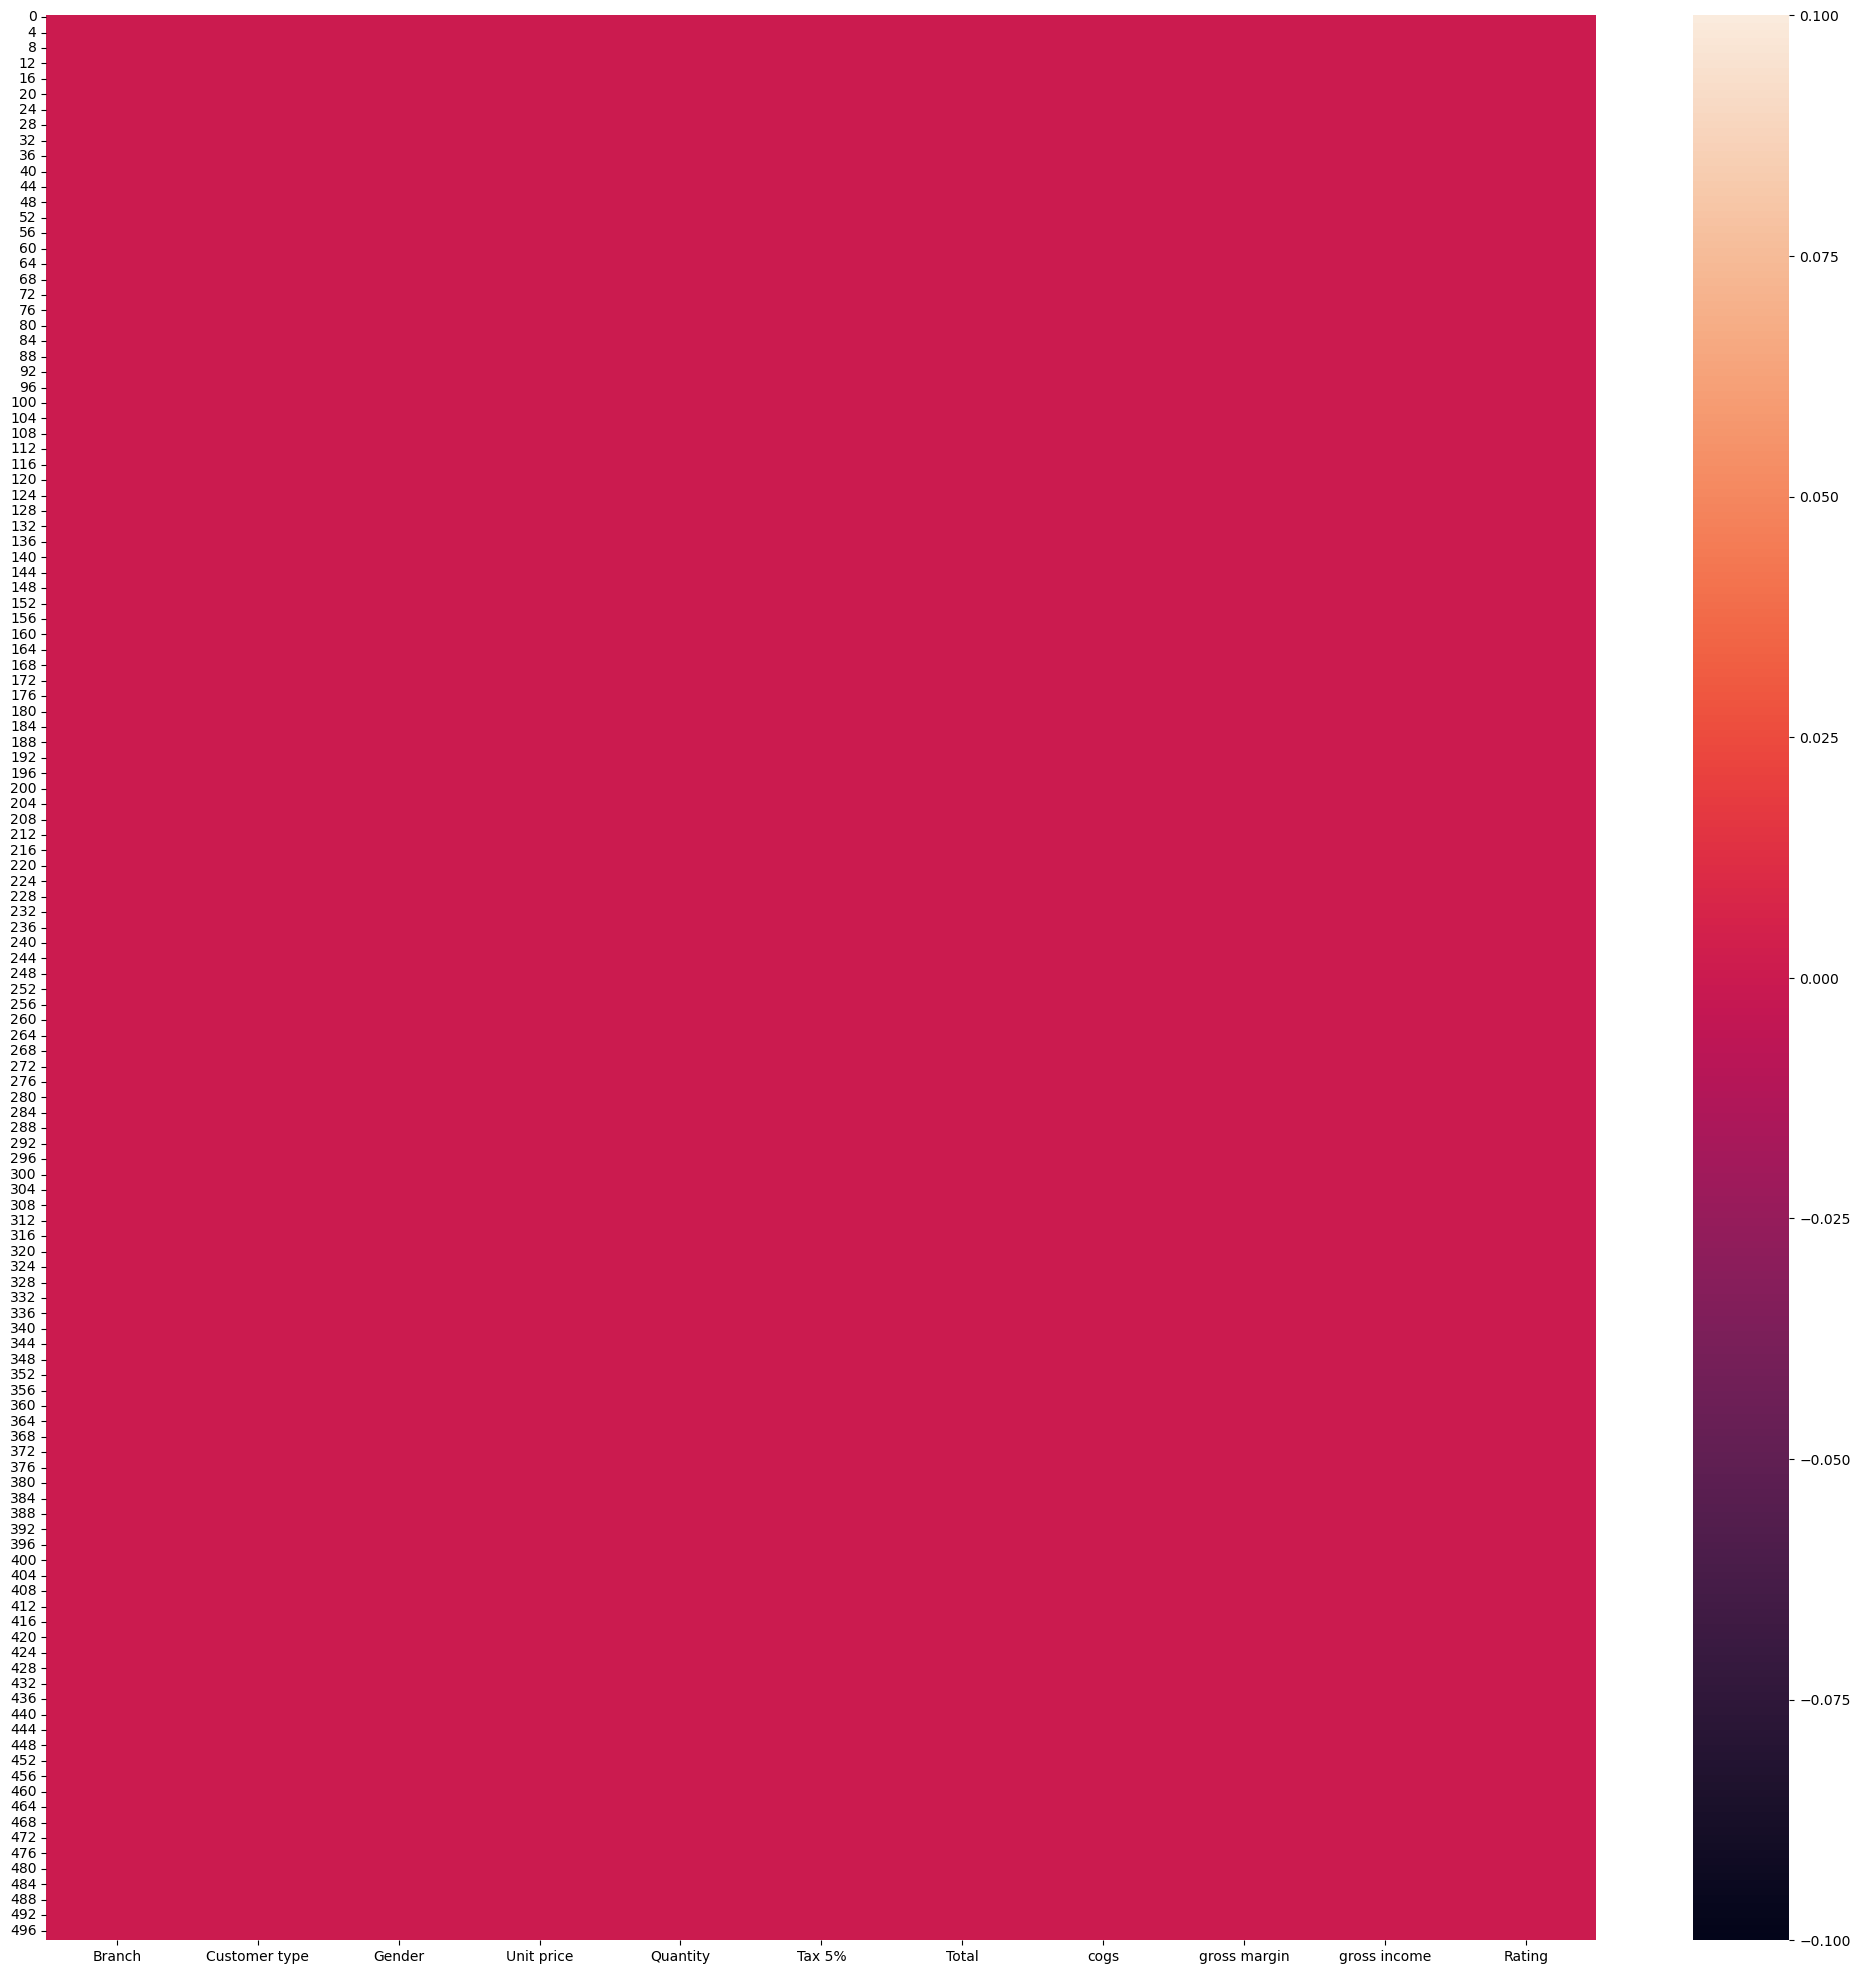

In [24]:
# plot heat map
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

C:\Users\Yash Nere\AppData\Local\Temp\ipykernel_8744\1393052948.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gross income'])


<Axes: xlabel='gross income', ylabel='Density'>

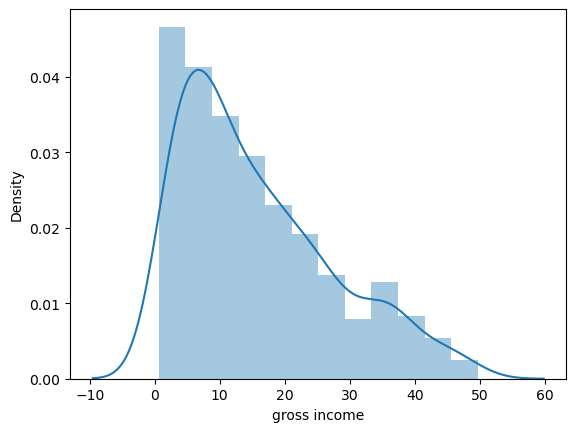

In [25]:
sns.distplot(df['gross income'])

In [26]:
#draw a pie chart for analyzing how many data store in each type

# Split the Data

In [27]:
# apply Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [28]:
x=df.drop("gross income",axis=1)
y=df['gross income']
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (499, 10)
shape of y= (499,)


In [29]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=2020)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (399, 10)
Shape of y_train =  (399,)
Shape of X_test =  (100, 10)
Shape of y_test =  (100,)


In [30]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

# Apply Machine Learning Algorithm

# Regression Algorithm

In [31]:
#Now use the Support Vector Classification
from sklearn.svm import SVR


In [32]:
regression_rbf =SVR(kernel='rbf')
regression_rbf.fit(x_train, y_train)



SVR()

In [33]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train,y_train)
svr_rbf.score(x_test,y_test)


0.9833995100179818

In [34]:
svr_linear= SVR(kernel='linear', degree=2,)
svr_linear.fit(x_train, y_train)
svr_linear.score(x_test, y_test)


0.9999691366162303

# linear regression

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [36]:
lr.score(x_test,y_test)

1.0

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [38]:
y_pred=lr.predict(x_test)


In [39]:
y_test


498     4.9065
423    10.1680
288    16.9785
234    25.9700
495    30.3680
        ...   
236     4.3525
133    26.2350
208     4.5555
113    26.1315
477    16.8140
Name: gross income, Length: 100, dtype: float64

In [40]:
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 5.941913627793838e-15


In [41]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 4.960455979642875e-29


In [42]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 7.043050461016785e-15


In [43]:
print("r_squared",r2_score(y_test,y_pred))


r_squared 1.0


# KNeighborsRegressor Algorithm

In [44]:
from sklearn.neighbors import KNeighborsRegressor


In [45]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train,y_train)


KNeighborsRegressor()

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [47]:
sc.fit(x_train)


StandardScaler()

In [48]:
regressor.score(x_test,y_test)


0.9994949263981961

<Axes: xlabel='Customer type', ylabel='count'>

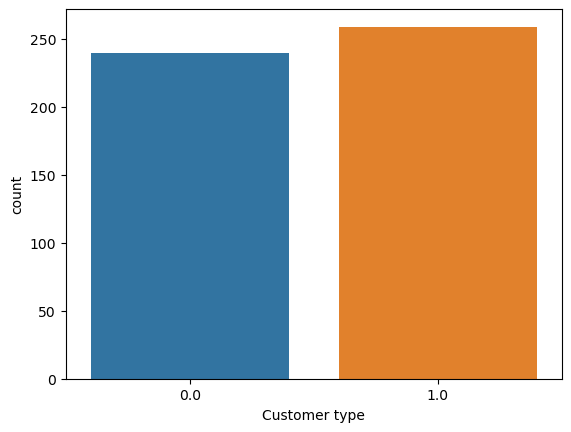

In [49]:
sns.countplot(x='Customer type',data=df, width=0.8)


# Ridge and Lasso linear regression¶

In [50]:
from sklearn.linear_model import Ridge, Lasso


In [51]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)


0.9999999999999957

In [52]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)


0.9999998816460072

In [53]:
rd2=Ridge(alpha=2)
rd2.fit(x_train,y_train)
rd2.score(x_test,y_test)


0.9999999999999826

In [54]:
ls2=Lasso(alpha=2)
ls2.fit(x_train,y_train)
ls2.score(x_test,y_test)

0.9999995265840287

In [55]:
ls3=Lasso(alpha=3)
ls3.fit(x_train,y_train)
ls3.score(x_test,y_test)

0.9999989348140647